In [1]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-07-08 18:01:36.979042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 18:01:37.974485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 18:01:37.975234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
import os #operating system make available os function
import zipfile # zip and unzip

local_zip = '/home/piyush/.keras/datasets/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
# Directory with our training horse pictures
import os
train_Parasitized_dir = os.path.join('cell_images/Parasitized')

# Directory with our training human pictures
train_Uninfected_dir = os.path.join('cell_images/Uninfected')

In [4]:
train_Parasitized_names = os.listdir(train_Parasitized_dir)
print(train_Parasitized_names[:10])

train_Uninfected_names = os.listdir(train_Uninfected_dir)
print(train_Uninfected_names[:10])

['C184P145ThinF_IMG_20151203_104334_cell_21.png', 'C70P31_ThinF_IMG_20150819_142239_cell_2.png', 'C133P94ThinF_IMG_20151004_155518_cell_113.png', 'C119P80ThinF_IMG_20151002_122720_cell_169.png', 'C181P142ThinF_IMG_20151127_160650_cell_176.png', 'C131P92ThinF_IMG_20151004_145224_cell_134.png', 'C167P128ReThinF_IMG_20151201_105559_cell_236.png', 'C132P93ThinF_IMG_20151004_152642_cell_14.png', 'C39P4thinF_original_IMG_20150622_111723_cell_90.png', 'C99P60ThinF_IMG_20150918_141620_cell_37.png']
['C92P53ThinF_IMG_20150821_151646_cell_169.png', 'C188P149ThinF_IMG_20151203_134209_cell_190.png', 'C113P74ThinF_IMG_20150930_134751_cell_30.png', 'C109P70ThinF_IMG_20150930_102716_cell_33.png', 'C239ThinF_IMG_20151127_113202_cell_12.png', 'C232ThinF_IMG_20151112_154251_cell_276.png', 'C145P106ThinF_IMG_20151016_154756_cell_51.png', 'C203ThinF_IMG_20151029_102123_cell_6.png', 'C93P54ThinF_IMG_20150821_163815_cell_197.png', 'C201ThinF_IMG_20150930_143502_cell_155.png']


In [5]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

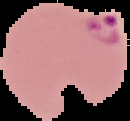

In [6]:
image_1 = load_img('cell_images/Parasitized/C133P94ThinF_IMG_20151004_155518_cell_113.png')
image_1

In [7]:
import matplotlib.image as mpimg
import numpy as np
imd = mpimg.imread('cell_images/Parasitized/C133P94ThinF_IMG_20151004_155518_cell_113.png')
imd.shape

(121, 130, 3)

In [8]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [9]:
folder_count = len(glob('cell_images/*'))
print(folder_count)

2


In [10]:
IMG_HIEGHT = 100
IMG_WIDHT = 100

In [11]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                    validation_split=0.2,)

In [12]:
train_data_gen = image_gen_train.flow_from_directory(directory='cell_images',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='binary')

Found 22048 images belonging to 2 classes.


In [13]:
train_data_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [14]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
val_data_gen = image_gen_val.flow_from_directory(directory='cell_images',
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation',
                                                class_mode='binary')

Found 5510 images belonging to 2 classes.


In [15]:
import time

In [16]:
sample_data, label = next(train_data_gen)

In [17]:
sample_data.shape

(32, 100, 100, 3)

In [18]:
label

array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

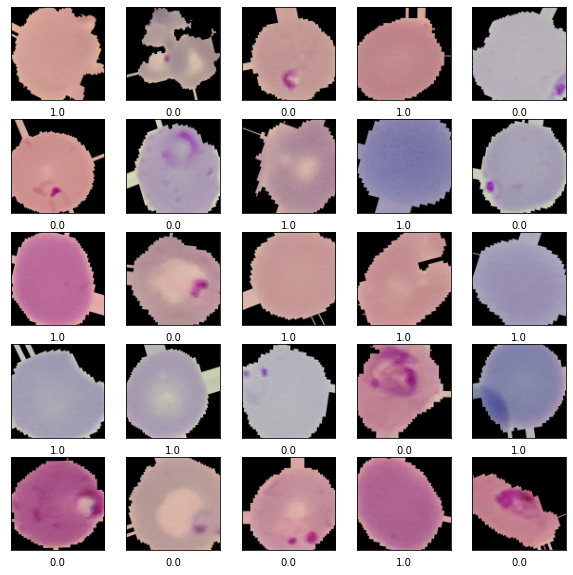

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

In [20]:

from keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (100, 100, 3),include_top = False, weights = 'imagenet')

2022-07-08 18:02:00.531920: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-08 18:02:00.533180: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 18:02:00.533543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 18:02:00.533724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(base_model.input, x)

In [23]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [24]:
vgg_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

/home/piyush/miniconda3/envs/tensortorch/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [25]:
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [26]:
t1 = time.time()
history = vgg_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)
t2 = time.time()

/tmp/ipykernel_9168/604581339.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = vgg_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)


Epoch 1/10


2022-07-08 18:02:20.160164: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2022-07-08 18:02:28.596629: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-08 18:02:28.598392: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-08 18:02:28.598478: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-07-08 18:02:28.600172: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-07-08 18:02:28.600314: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


689/689 [==============================] - 82s 83ms/step - loss: 0.2822 - accuracy: 0.8862 - val_loss: 0.2669 - val_accuracy: 0.8902
Epoch 2/10
689/689 [==============================] - 61s 89ms/step - loss: 0.2113 - accuracy: 0.9196 - val_loss: 0.2483 - val_accuracy: 0.9045
Epoch 3/10
689/689 [==============================] - 66s 95ms/step - loss: 0.2071 - accuracy: 0.9216 - val_loss: 0.2568 - val_accuracy: 0.9049
Epoch 4/10
689/689 [==============================] - 66s 96ms/step - loss: 0.2071 - accuracy: 0.9239 - val_loss: 0.2429 - val_accuracy: 0.9138
Epoch 5/10
689/689 [==============================] - 69s 100ms/step - loss: 0.2049 - accuracy: 0.9253 - val_loss: 0.2218 - val_accuracy: 0.9187
Epoch 6/10
689/689 [==============================] - 70s 101ms/step - loss: 0.1995 - accuracy: 0.9268 - val_loss: 0.2660 - val_accuracy: 0.9100
Epoch 7/10
689/689 [==============================] - 73s 105ms/step - loss: 0.2016 - accuracy: 0.9286 - val_loss: 0.2662 - val_accuracy: 0.9118


In [27]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

Time to train model: 11.76 minuts


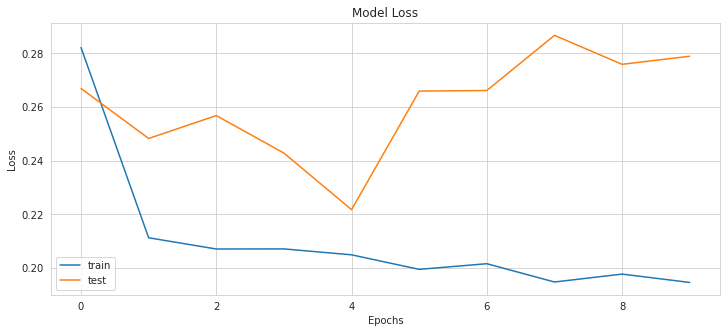

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [29]:
img = load_img('Uninfected.png',target_size=(100,100))

In [30]:
# ResNet50

In [31]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(100, 100 ,3), include_top=False, weights="imagenet")

In [32]:
for layer in base_model.layers:
    layer.trainable = False

In [33]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(16, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

res_net_model = tf.keras.models.Model(base_model.input, x)


res_net_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']       

 conv2_block3_2_conv (Conv2D)   (None, 25, 25, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 25, 25, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 25, 25, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 25, 25, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 13, 13, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 13, 13, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 13, 13, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 13, 13, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 7, 7, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 7, 7, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 7, 7, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 7, 7, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 7, 7, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 7, 7, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [34]:
res_net_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

/home/piyush/miniconda3/envs/tensortorch/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [35]:
t1 = time.time()
history = res_net_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)
t2 = time.time()

Epoch 1/10


/tmp/ipykernel_9168/3371208544.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = res_net_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)


689/689 [==============================] - 72s 98ms/step - loss: 0.6193 - accuracy: 0.6593 - val_loss: 0.5631 - val_accuracy: 0.7147
Epoch 2/10
689/689 [==============================] - 67s 97ms/step - loss: 0.5821 - accuracy: 0.6949 - val_loss: 0.5276 - val_accuracy: 0.7430
Epoch 3/10
689/689 [==============================] - 67s 97ms/step - loss: 0.5651 - accuracy: 0.7100 - val_loss: 0.5314 - val_accuracy: 0.7348
Epoch 4/10
689/689 [==============================] - 66s 96ms/step - loss: 0.5486 - accuracy: 0.7201 - val_loss: 0.5318 - val_accuracy: 0.7377
Epoch 5/10
689/689 [==============================] - 67s 97ms/step - loss: 0.5409 - accuracy: 0.7239 - val_loss: 0.4905 - val_accuracy: 0.7608
Epoch 6/10
689/689 [==============================] - 67s 98ms/step - loss: 0.5373 - accuracy: 0.7303 - val_loss: 0.5346 - val_accuracy: 0.7356
Epoch 7/10
689/689 [==============================] - 69s 100ms/step - loss: 0.5307 - accuracy: 0.7327 - val_loss: 0.4679 - val_accuracy: 0.7797
Ep

In [36]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')
train_score = res_net_model.evaluate_generator(train_data_gen)
valid_score = res_net_model.evaluate_generator(val_data_gen)
print("Train_Accuracy = ", train_score[1])
print("Validation_Accuracy = ", valid_score[1])

Time to train model: 11.33 minuts


/tmp/ipykernel_9168/3250500809.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  train_score = res_net_model.evaluate_generator(train_data_gen)
/tmp/ipykernel_9168/3250500809.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_score = res_net_model.evaluate_generator(val_data_gen)


Train_Accuracy =  0.7530388236045837
Validation_Accuracy =  0.7745916247367859


In [37]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (100, 100, 3), include_top = False, weights = 'imagenet')

In [38]:
for layer in base_model.layers:
    layer.trainable = False

In [39]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

inception_model = tf.keras.models.Model(base_model.input, x)

In [40]:
inception_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [41]:
t1 = time.time()
history = inception_model.fit_generator(train_data_gen, epochs=50, validation_data=val_data_gen)
t2 = time.time()
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

Epoch 1/50


/tmp/ipykernel_9168/2330943912.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = inception_model.fit_generator(train_data_gen, epochs=50, validation_data=val_data_gen)


689/689 [==============================] - 73s 99ms/step - loss: 0.3956 - accuracy: 0.8181 - val_loss: 0.3501 - val_accuracy: 0.8466
Epoch 2/50
689/689 [==============================] - 64s 92ms/step - loss: 0.3463 - accuracy: 0.8486 - val_loss: 0.3366 - val_accuracy: 0.8535
Epoch 3/50
689/689 [==============================] - 64s 93ms/step - loss: 0.3395 - accuracy: 0.8511 - val_loss: 0.3239 - val_accuracy: 0.8606
Epoch 4/50
689/689 [==============================] - 63s 91ms/step - loss: 0.3301 - accuracy: 0.8563 - val_loss: 0.3315 - val_accuracy: 0.8570
Epoch 5/50
689/689 [==============================] - 63s 92ms/step - loss: 0.3344 - accuracy: 0.8529 - val_loss: 0.3125 - val_accuracy: 0.8652
Epoch 6/50
689/689 [==============================] - 62s 91ms/step - loss: 0.3266 - accuracy: 0.8606 - val_loss: 0.3124 - val_accuracy: 0.8677
Epoch 7/50
689/689 [==============================] - 62s 90ms/step - loss: 0.3170 - accuracy: 0.8628 - val_loss: 0.3241 - val_accuracy: 0.8615
Epo

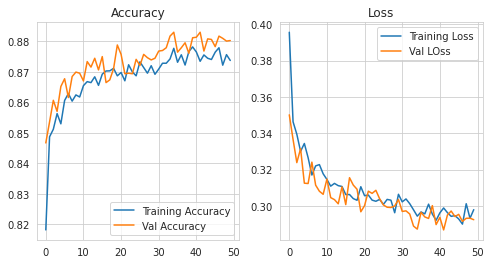

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [43]:
tf.keras.models.save_model(inception_model,'cells_malaria.h5')

In [44]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [45]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [46]:
model = tf.keras.models.load_model('cells_malaria.h5')

In [47]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_2 (BatchNo  (None, 49, 49, 32)  96          ['conv2d[0][0]']                 
 rmalization)                                                                                     
                                                                                            

 batch_normalization_12 (BatchN  (None, 10, 10, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_13 (BatchN  (None, 10, 10, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 10, 10, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 10, 10, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 10, 10, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_22 (BatchN  (None, 10, 10, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_25 (BatchN  (None, 10, 10, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_36 (BatchN  (None, 4, 4, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 4, 4, 128)    0           ['batch_normalization_36[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 4, 4, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_46[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_47 (BatchN  (None, 4, 4, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_47[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_57 (BatchN  (None, 4, 4, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 4, 4, 160)    0           ['batch_normalization_57[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 4, 4, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_53 (BatchN  (None, 4, 4, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 4, 4, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_63 (BatchN  (None, 4, 4, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_68 (BatchN  (None, 4, 4, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_76 (BatchN  (None, 4, 4, 192)   576         ['conv2d_74[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_72[0][0]'] 
                                                                                                  
 activation_74 (Activation)     (None, 4, 4, 192)    0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 conv2d_71 (Conv2D)             (None, 1, 1, 320)    552960      ['activation_70[0][0]']          
          

                                                                                                  
 activation_82 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_84[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 1, 1, 384)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 batch_normalization_86 (BatchN  (None, 1, 1, 192)   576         ['conv2d_84[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_76 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 mixed9_0 

 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 1, 1, 320)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 1, 1, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
                                                                                                  
 concatenate_1 (Concatenate)    (None, 1, 1, 768)    0           ['activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 activatio

In [48]:
img = load_img('Uninfected.png',target_size=(100,100))

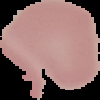

In [49]:
img

In [50]:
img = img_to_array(img)

In [51]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [52]:
img.shape

(100, 100, 3)

In [53]:
img = img.reshape(1,100,100,3)

In [54]:
img.shape

(1, 100, 100, 3)

In [55]:
model.predict(img)

array([[1.]], dtype=float32)

In [56]:
img2 = load_img('Parasitised2.png',target_size=(100,100))

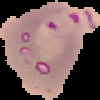

In [57]:
img2

In [58]:
img2.shape

AttributeError: shape

In [ ]:
img2 = img.reshape(1,100,100,3)

In [ ]:
img2.shape

In [ ]:
model.predict(img2)

In [ ]:
img3 = load_img('Parasitized3.png',target_size=(100,100))

In [ ]:
img3

In [ ]:
img3 = img.reshape(1,100,100,3)

In [ ]:
model.predict(img3)